# Capstone Project: "Transforming Neighborhoods by Predicting Crime Outcomes in the UK
# Name: Marina Mnoyan
# Contact: marina.mnoyan@gmail.com
# Date: July 4, 2022
# Project Purpose:
Help policymakers to identify and address the factors that influence whether crimes are solved. The main dataset was downloaded from the UK Police Department website. Additional datasets were acquired from various UK Government sources in order to provide neighborhood-level characteristics. 


# Project Framework & Deliverables

    1. Data Acquisition, pre-processing with MS Excel & Git Bash       MS Excel, Git Bash (details in the ReadMe text file)         2. Main dataset Wrangling, Processing & Cleaning                   Jupyter Notebook 1     
    3. Additional dataset Merging, Wrangling, Processing & Cleaning    Jupyter Notebook 2    
    4. Exploratory Data Analysis & Visualizations                      Jupyter Notebook 3     <== current notebook
                                                                       Tableau File
    5. Feature Engineering & Selection                                 Jupyter Notebook 4
    6. Modeling & Evaluation                                           Jupyter Notebook 5
    7. Findings & Recommendations                                      PDF Business Report
                                                                       PDF Presentation
    8. Additional Information including links to original data         ReadMe text file

# Jupyter Notebook 3 of 5: Exploratory Data Analysis & Visualizations

Steps:
* [1. Importing the dataset](#1)
* [2. Preliminary EDA*](#2)
* [3. CSV Output](#3)


#### * Please see the Tableau Book for additional EDA

<a id='1'></a>
## 1) Importing the dataset from Jupyter Notebook 2

First, we will import basic packages that will help with the EDA:

In [1]:
# Import data science packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

Then we need to make CSV files readable for Jupyter Notebook. We will import the file created at the end of Jupyter Notebook 2. As a reminder, it contains cleaned dataset which includes both main Crime data and additional neighborhood-level demographic information.

In [2]:
# Importing the CSV file
df = pd.read_csv('data/df_crime_EDA.csv', index_col=False)

Let's perform some very basic checks to make sure everything was imported properly:

In [3]:
# Getting the option display all columns in the dataset
pd.get_option("display.max_columns")

# Setting to display all columns in the dataset
pd.set_option("display.max_columns", None)

# Checking the first 5 rows of the dataset
df.head()

,Month,Police_Jurisdiction,Longitude,Latitude,LSOA code,LSOA name,Crime type,Last outcome category,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious
0,1.0,Avon and Somerset Constabulary,-2.515072,51.419357,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
1,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
2,1.0,Avon and Somerset Constabulary,-2.494870,51.422276,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
3,1.0,Avon and Somerset Constabulary,-2.511927,51.409435,E01014399,Bath and North East Somerset 001A,Public order,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754
4,1.0,Avon and Somerset Constabulary,-2.511761,51.409966,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,2161.0,0.467376,0.176307,0.135585,0.210088,0.204535,0.273484,0.109399,0.300324,19195.0,0.940975,0.06,0.152941,0.955665,0.014778,0.0,0.001847,0.0,0.00431,0.000616,0.001232,0.01601,0.005542,4.12,524.0,370000.0,0.078015,41.6,0.599754


In [4]:
# Checking the size of the dataset
df.shape

(3730444, 37)

In this dataset, we have 37 columns:

* **Month**: The month when crime occurred
* **Police Jurisdiction**: Police jurisdiction that reported the crime. There are 42 police jurisdictions in the UK.
* **Longitude**: Longitude coordinate of where crime occurred
* **Latitude**: Latitude coordinate of where crime occurred
* **LSOA code**: Neighborhood code where the crime occurred
* **LSOA name**: Name of the neighborhood where the crime occurred
* **Crime type**: Classification of crime
* **Last outcome category**: Result of the investigation
* **Population**: LSOA-level demographic statistic (size of the LSOA population)
* **Proportion_Males**: LSOA-level demographic statistic (proportion of males in given LSOA)
* **Proportion 0-15**: LSOA-level demographic statistic (proportion of population aged 0-15 in given LSOA)
* **Proportion 16-29**: LSOA-level demographic statistic (proportion of population aged 16-29 in given LSOA)
* **Proportion 30-44**: LSOA-level demographic statistic (proportion of population aged 30-44 in given LSOA)
* **Proportion 45-64**: LSOA-level demographic statistic (proportion of population aged 45-64 in given LSOA)
* **Proportion 65+**: LSOA-level demographic statistic (proportion of population aged 65+ in given LSOA)
* **Proportion 0 car households**: LSOA-level demographic statistic (proportion of population without cars in given LSOA)
* **# of People in Household**: LSOA-level demographic statistic (average number of people per household in given LSOA)
* **Deprivation Index**: LSOA-level demographic statistic (UK Government designated index of deprivation, with 1 being the most deprivated)
* **Job Seeker Allowance Proportion**: LSOA-level demographic statistic (proportion of population on social assistance)
* **FSM 11-15**: LSOA-level demographic statistic (proportion of population aged 11-15 in given LSOA that accessed Free School Meals)
* **FSM 5-10**: LSOA-level demographic statistic (proportion of population aged 5-10 in given LSOA that accessed Free School Meals)
* **WBR Proportion**: LSOA-level demographic statistic (proportion of White British ethnicity in given LSOA)
* **WAO Proportion**: LSOA-level demographic statistic (proportion of White: Any Other ethnicity in given LSOA)
* **ABD Proportion**: LSOA-level demographic statistic (proportion of Bangladeshi ethnicity in given LSOA)
* **AIN Proportion**: LSOA-level demographic statistic (proportion of Indian ethnicity in given LSOA)
* **APK Proportion**: LSOA-level demographic statistic (proportion of Pakistani ethnicity in given LSOA)
* **BAF Proportion**: LSOA-level demographic statistic (proportion of Black/Black British: African ethnicity in given LSOA)
* **BCA Proportion**: LSOA-level demographic statistic (proportion of Black/Black British: Caribbean ethnicity in given LSOA)
* **OXX Proportion**: LSOA-level demographic statistic (proportion of Any Other Ethnic Group ethnicity in given LSOA)
* **MIX Proportion**: LSOA-level demographic statistic (proportion of Mixed ethnicity in given LSOA)
* **AAB Proportion**: LSOA-level demographic statistic (proportion of Other Asian (East Asian, Chinese) ethnicity in given LSOA)

Everything looks great so we can proceed to the EDA portion.

<a id='2'></a>
## 2) Preliminary EDA

The majority of the EDA has been completed in Tableau Book but we look at some interesting analytics here as well.

In [5]:
# Let's start with some basic stats in non-scientific format
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Month,Longitude,Latitude,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious
count,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000,3730444.00000
mean,6.73219,-1.09388,52.36891,1879.15208,0.49901,0.19244,0.18404,0.20594,0.24802,0.16956,0.32376,0.37785,12797.28286,3.09989,0.17075,0.18900,0.76540,0.05765,0.00895,0.02903,0.02583,0.02326,0.01309,0.02030,0.03019,0.02322,2.71593,5015.55060,297527.47300,0.06292,38.74456,0.66618
std,3.35902,1.17392,1.13715,641.37422,0.02941,0.05242,0.09036,0.05322,0.04858,0.07777,0.16194,0.08398,8872.03861,2.16001,0.13780,0.14504,0.23266,0.05635,0.03100,0.05858,0.07462,0.03768,0.02538,0.02823,0.02349,0.02968,10.36587,4498.74900,242806.03776,0.01454,7.12717,0.09123
min,1.00000,-6.35525,49.91306,723.00000,0.34310,0.01511,0.03945,0.02982,0.02210,0.01141,0.00000,0.04671,1.00000,0.00000,0.00000,0.00000,0.00926,0.00065,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.04000,2.00000,25000.00000,-0.00561,18.20000,0.27221
25%,4.00000,-1.86674,51.47455,1523.00000,0.48106,0.16015,0.13945,0.17063,0.22176,0.11159,0.19287,0.32952,5323.00000,1.63468,0.05714,0.06612,0.64706,0.01880,0.00000,0.00313,0.00000,0.00229,0.00069,0.00304,0.01188,0.00497,0.27000,1887.00000,154975.00000,0.05376,33.50000,0.60732
50%,7.00000,-1.17802,52.21535,1731.00000,0.49461,0.19243,0.16588,0.20157,0.25138,0.15807,0.31629,0.38591,11179.00000,2.71429,0.14118,0.16031,0.86466,0.03677,0.00152,0.00998,0.00326,0.00792,0.00312,0.00861,0.02273,0.01231,0.43000,4065.00000,239975.00000,0.06288,37.90000,0.66624
75%,10.00000,-0.16126,53.36007,2050.00000,0.51104,0.22635,0.19570,0.23556,0.27944,0.21814,0.44531,0.43267,19476.00000,4.11877,0.25581,0.28704,0.94299,0.07605,0.00594,0.02816,0.01327,0.02676,0.01282,0.02535,0.04334,0.03026,0.96000,6550.00000,371500.00000,0.07185,43.80000,0.72203
max,12.00000,1.75952,55.79091,10294.00000,0.83657,0.44110,0.90465,0.46849,0.41798,0.62393,0.79245,1.00277,32844.00000,19.70173,1.00000,0.81633,0.99719,0.40957,0.61483,0.85596,0.85319,0.46162,0.27926,0.41203,0.18555,0.37124,672.84000,50780.00000,4870000.00000,0.14588,71.50000,0.96100


We can also look at boxplots and histograms for all numeric columns:

In [6]:
# Selecting only numeric columns from our dataframe
numeric_columns = df.select_dtypes("number").columns

# Saving the numeric columns in a dataframe
df_numeric = df[numeric_columns].copy()

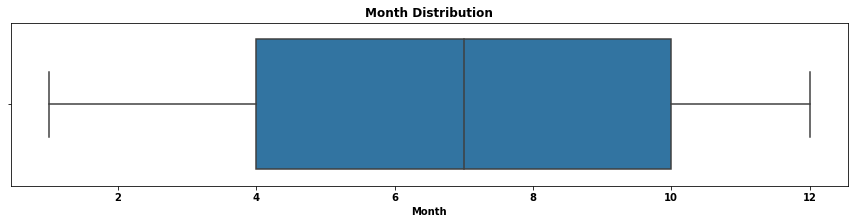

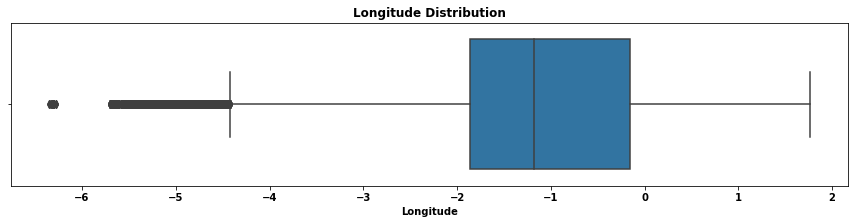

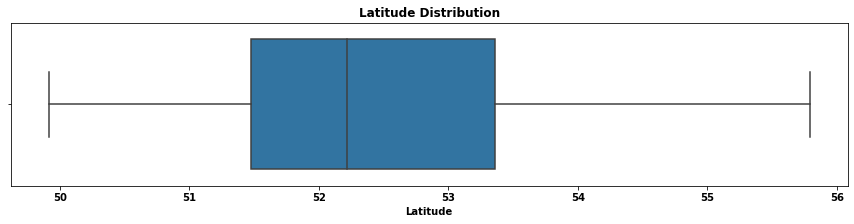

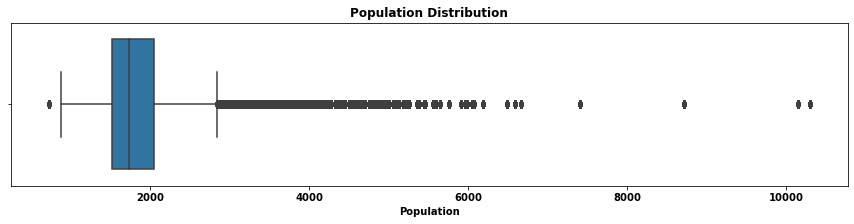

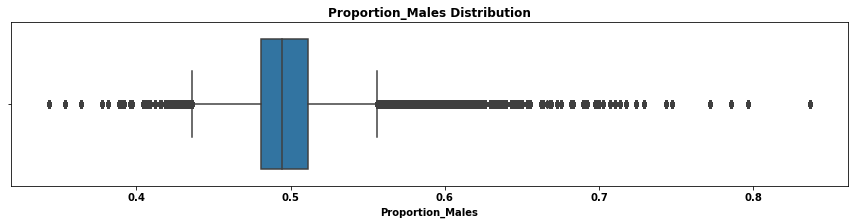

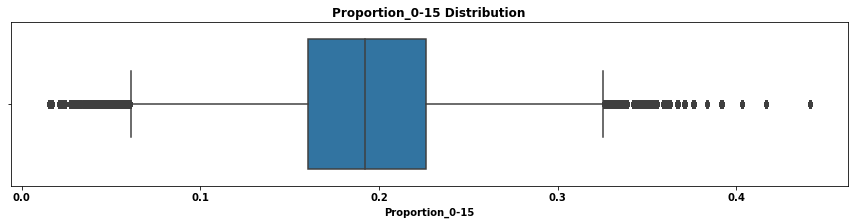

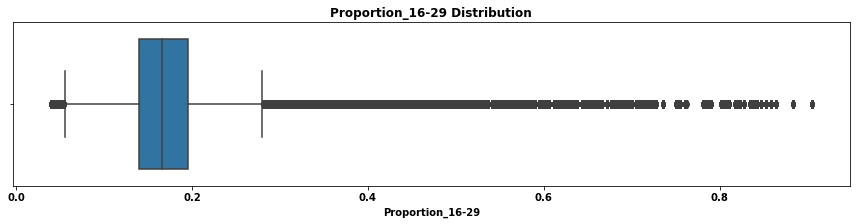

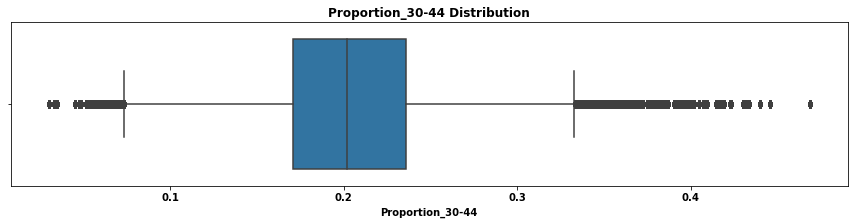

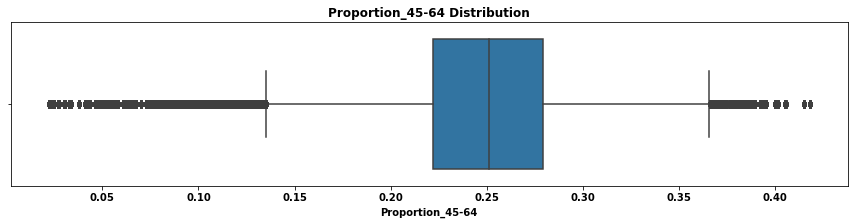

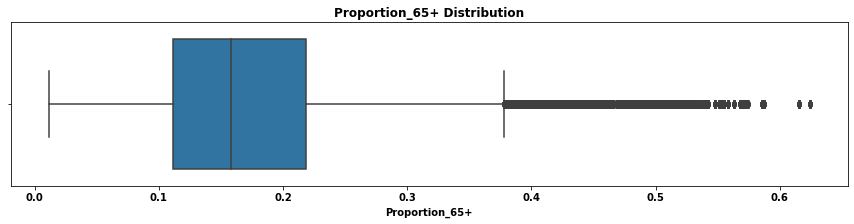

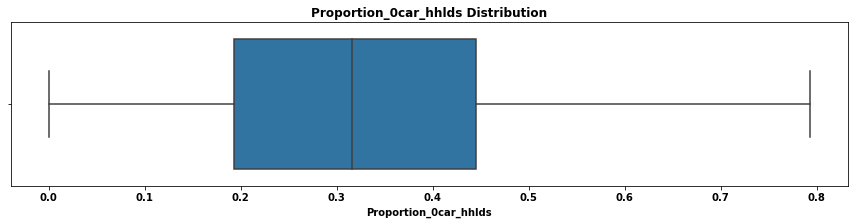

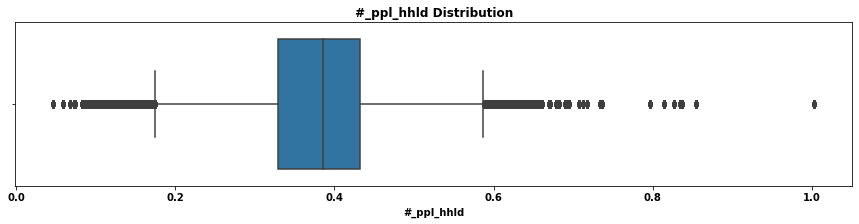

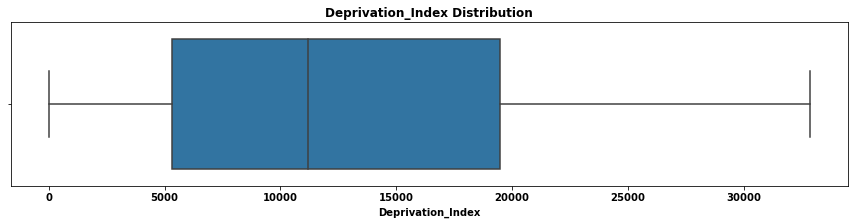

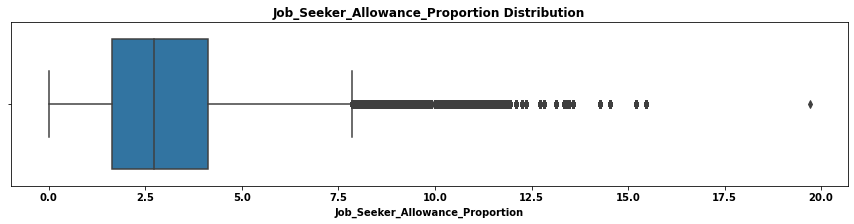

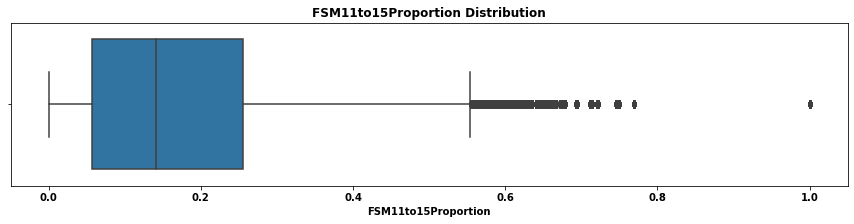

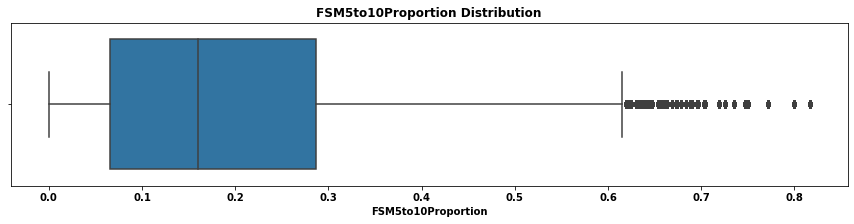

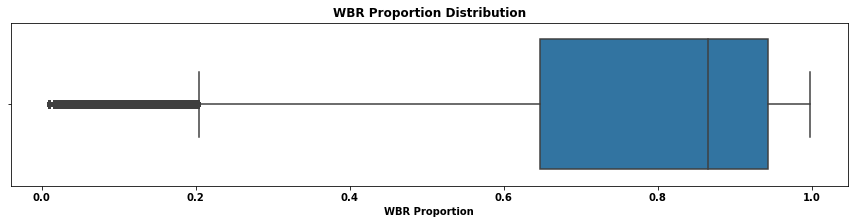

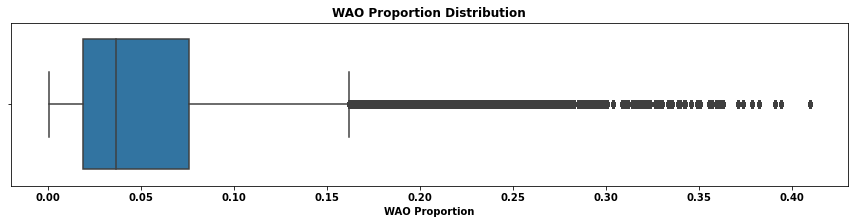

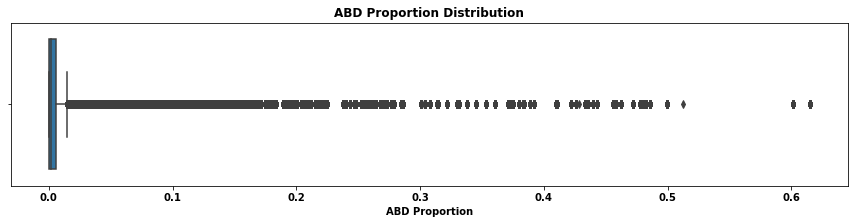

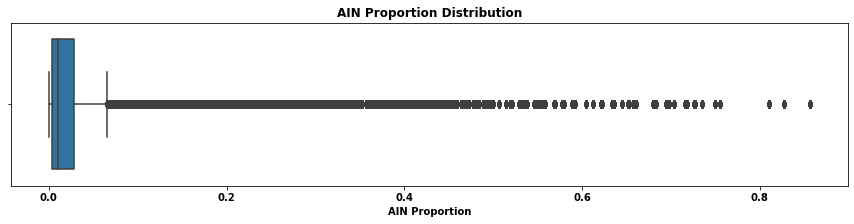

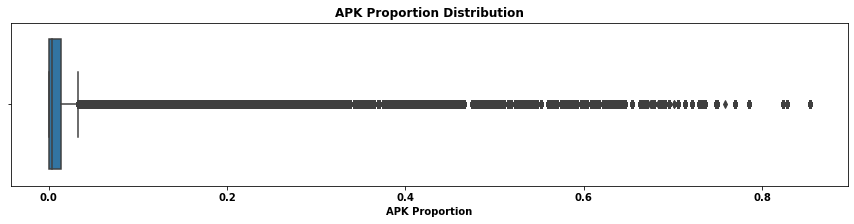

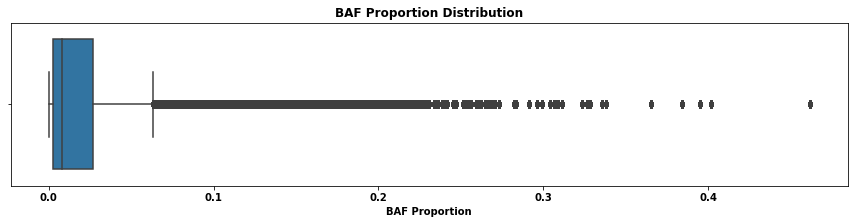

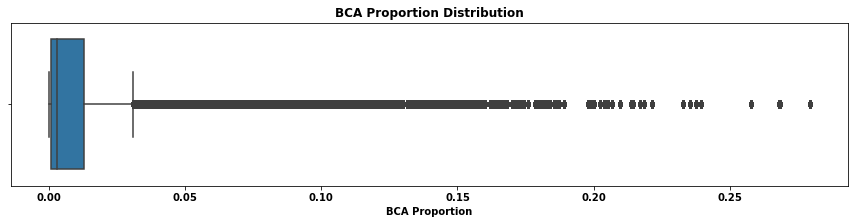

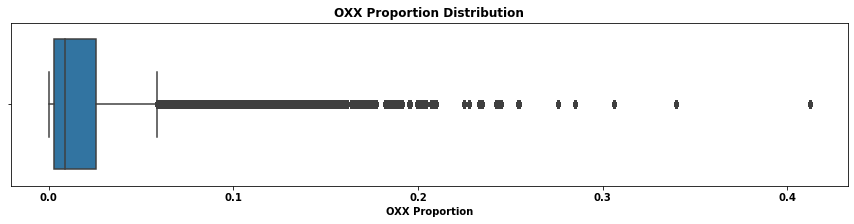

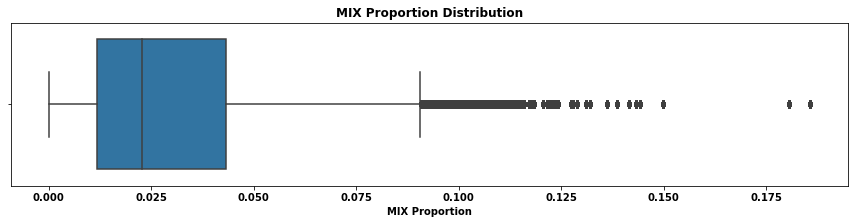

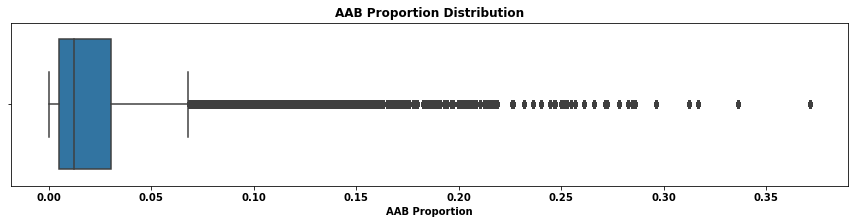

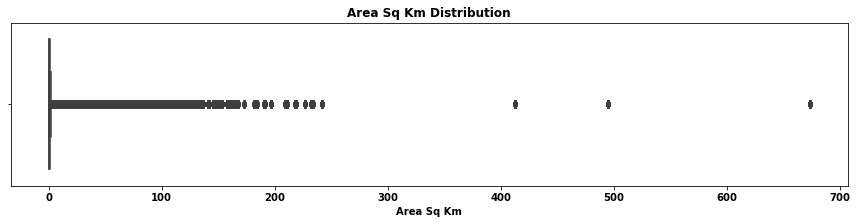

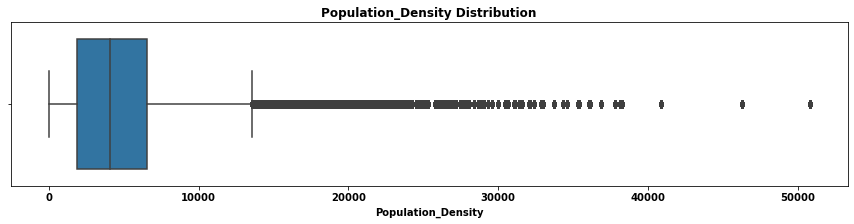

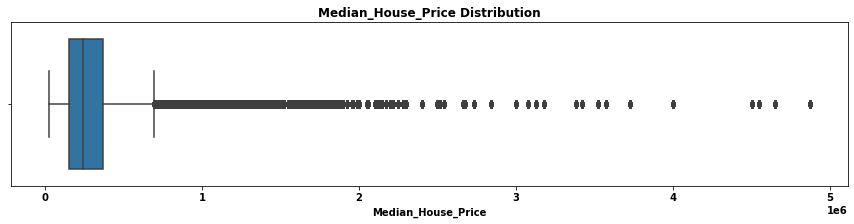

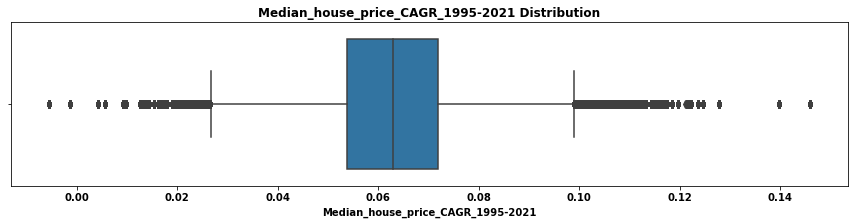

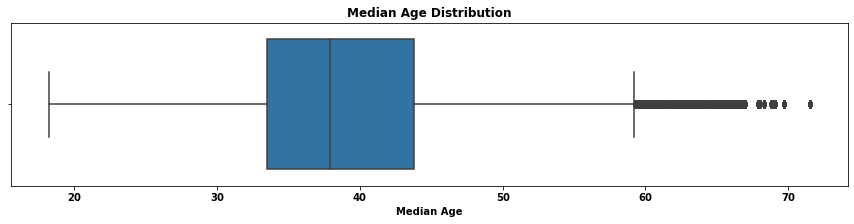

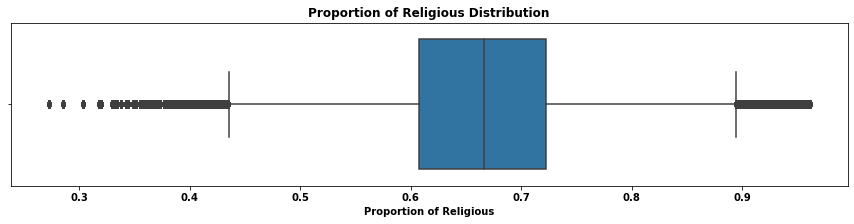

In [7]:
# Plotting boxplots for all numeric columns
for column in df_numeric.columns: 
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=column, data=df_numeric)
    plt.title(f"{column} Distribution")
    plt.show()

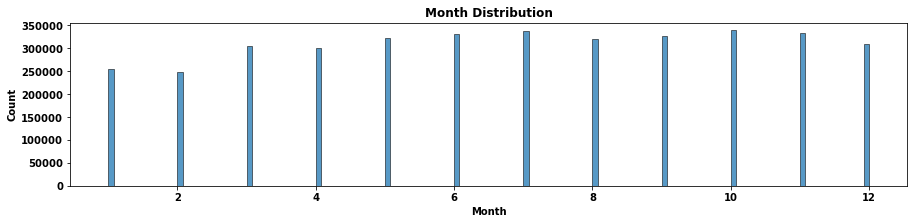

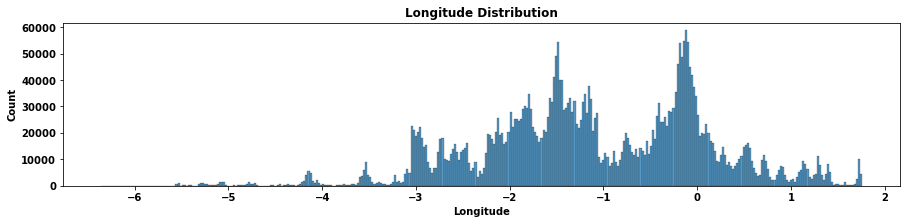

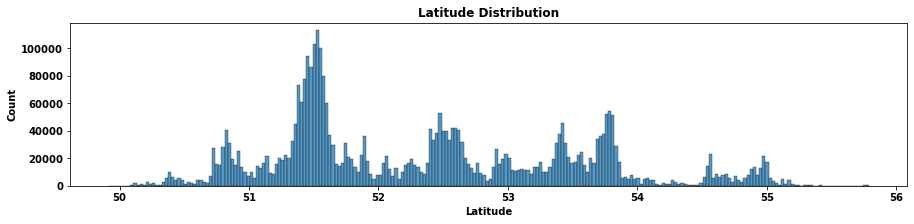

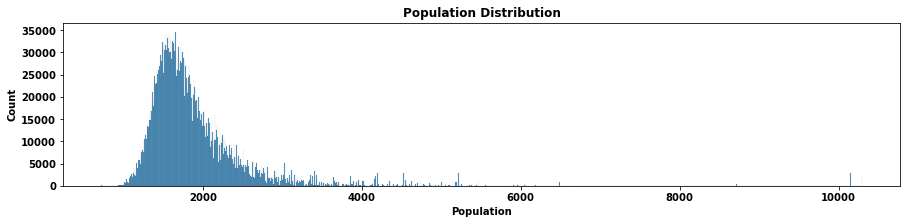

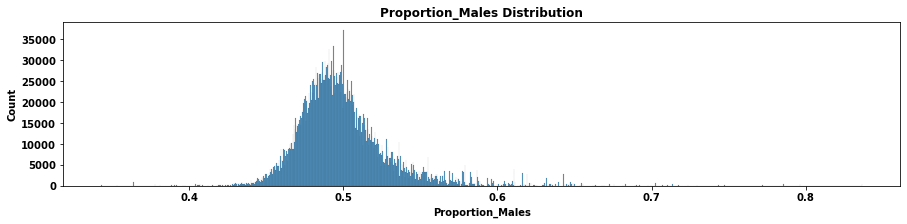

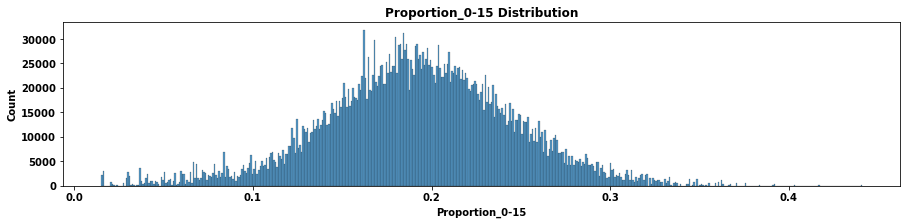

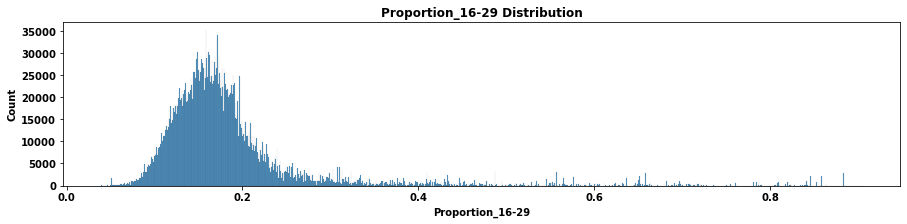

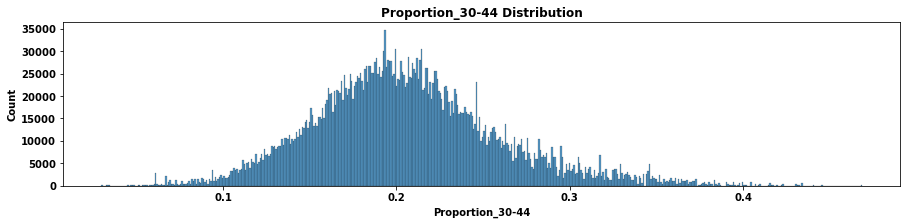

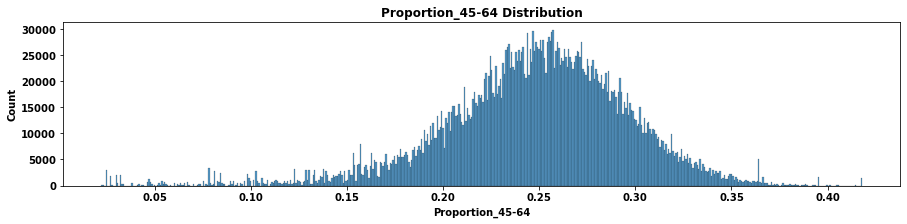

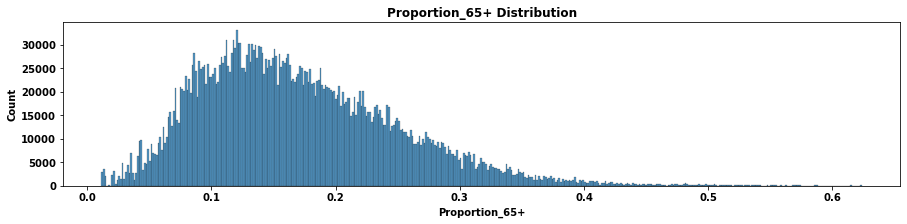

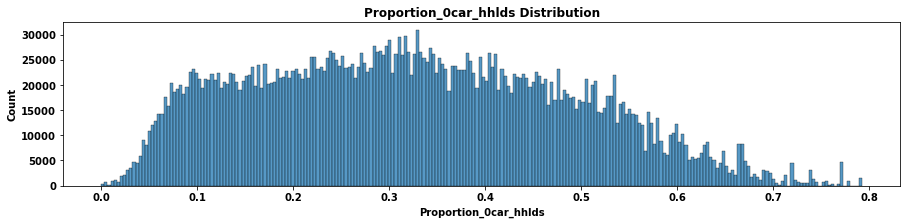

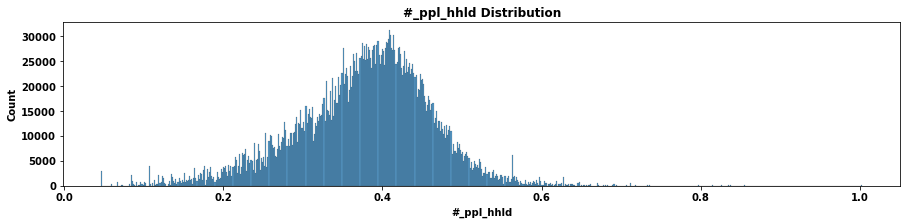

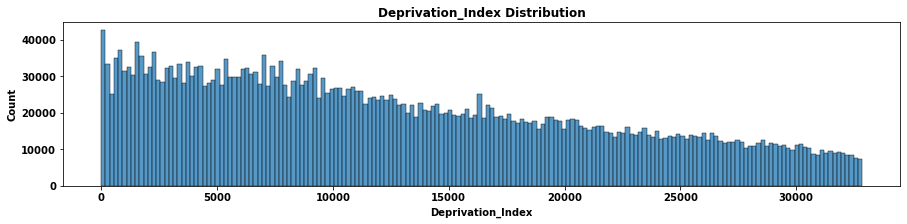

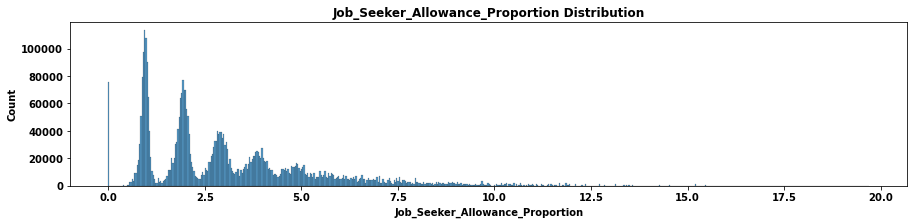

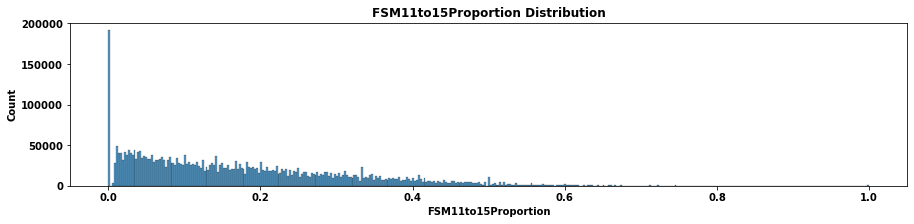

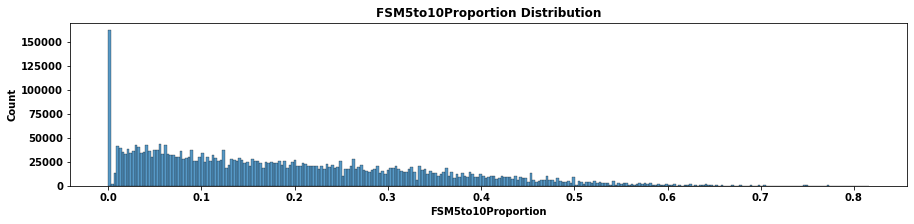

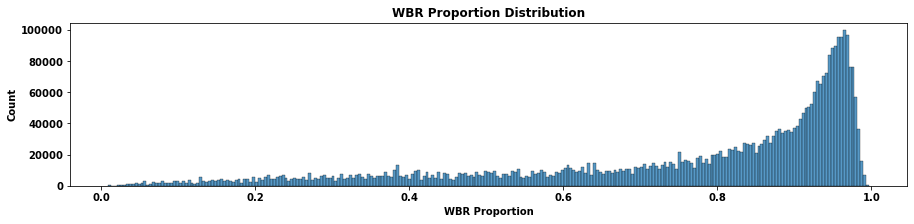

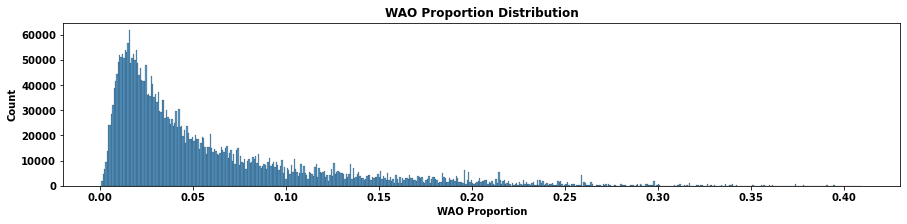

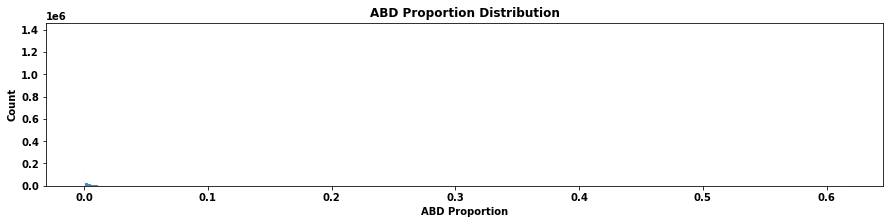

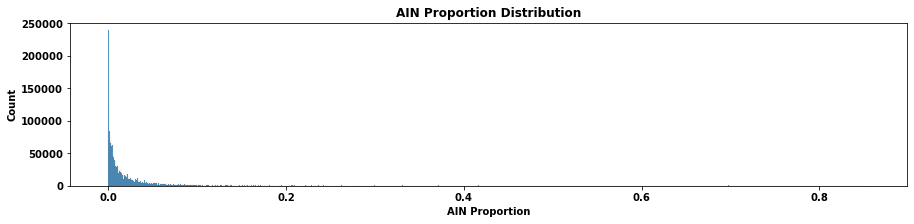

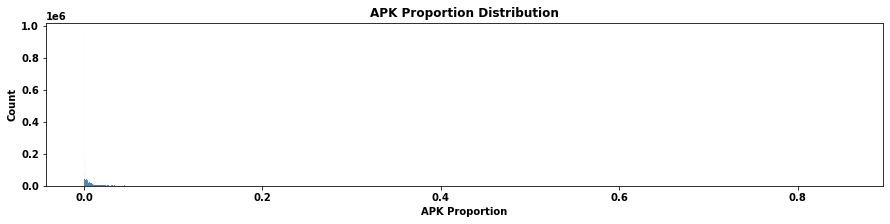

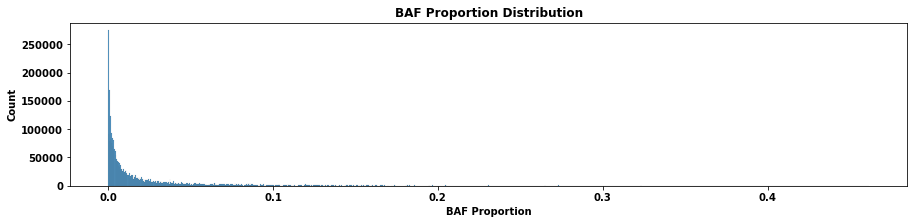

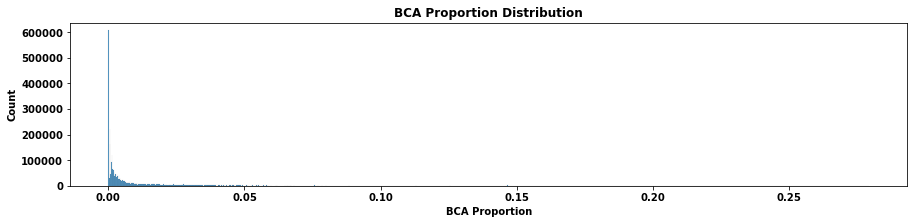

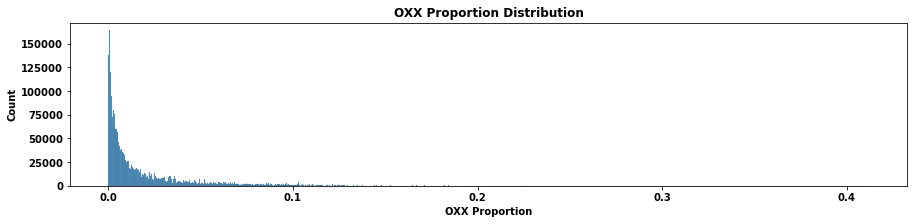

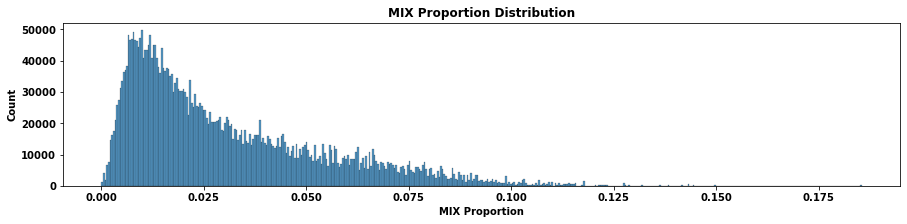

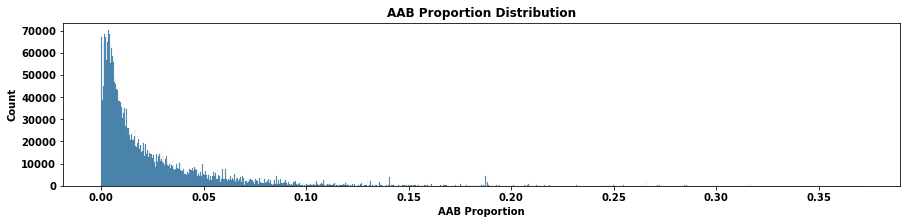

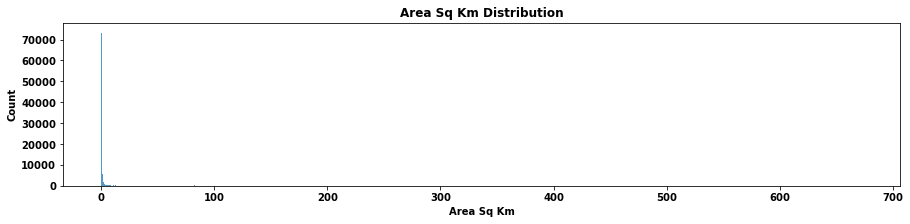

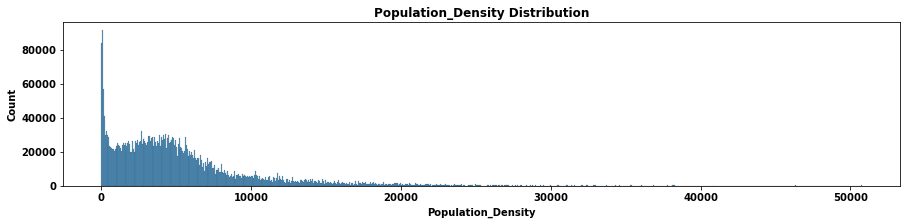

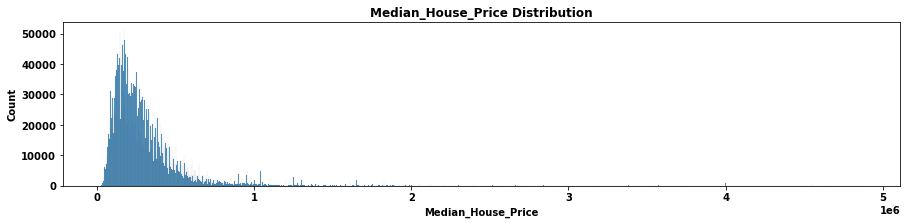

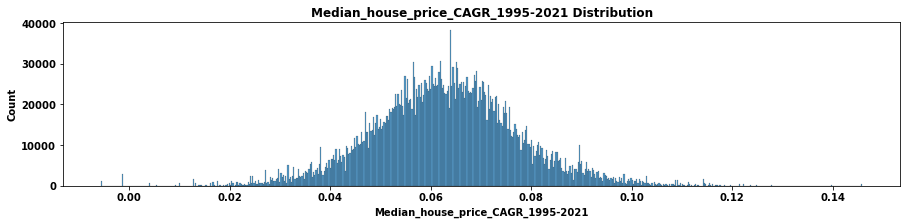

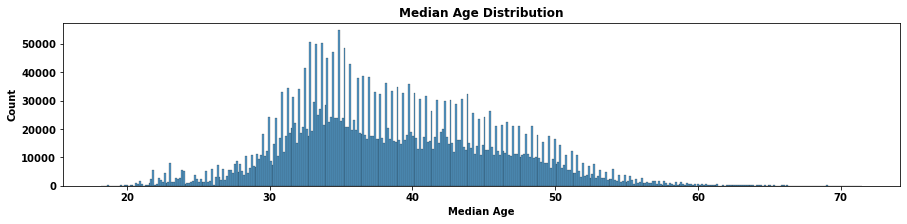

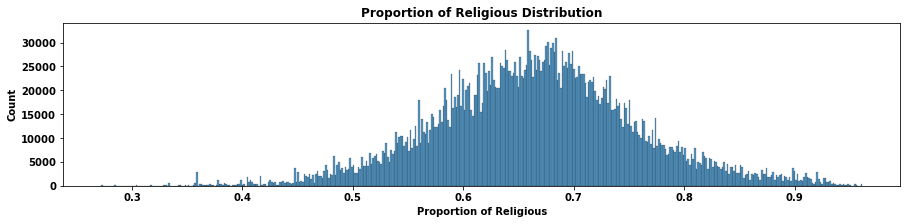

In [8]:
# Plotting histograms for all numeric columns
for column in df_numeric.columns: 
    plt.figure(figsize=(15, 3))
    sns.histplot(x=column, data=df)
    plt.title(f"{column} Distribution")
    plt.show()

Observations:

* There is some seasonality to crime, with peak happening in the summer and lower crime levels in the beginning and end of the year. Please note that this data is from 2021, meaning that Covid-19 lockdowns may have affected regular seasonality.
* Geographic data (longitude and latitude) don't follow a particular distribution, which is to be expected given the type of data and that the information is from across the UK
* Population distribution is left-skewed normal, with a lot of observations hovering around 1800, and a large number of large observations
* Proportion of males is somewhat skewed but follows a relatively normal distribution. Same goes for Median Age, Median House Price CAGR and Proportion of Religious
* Age bracket distributions are somewhat normal, some with very long tails
* Proportion of households without cars has a relatively low variability compared to others
* Number of people in the household is somewhat normal, with a large number of outliers
* Deprivation index goes from 1 to ~34000, which is reflected in its distribution
* Job Seeker Allowance proportion distribution looks like a collection of several normal distributions
* Proportion of Free School Meal population somewhat resembles a log function, with many observations being a zero or close to a zero (indicating relatively wealthy neighborhooods, or lack of children in that age group); we can consider changing log-transforming these in the next step
* Majority of ethnicity propostions, as well as the Population Density and Median House Price follow a log distribution; we can consider changing log-transforming these in the next step


While the majority of independent variables are not normally distributed, this is not necessarily a cause for concern for the classifier models we are going to use. We will attempt to use log-transformations to make them more symmetric, to see whether that improves our models.

Now we can look at unique values per columns:

In [9]:
# Looking at unique values
df.nunique()

Month                                    12
Police_Jurisdiction                      42
Longitude                            444504
Latitude                             361077
LSOA code                             28874
LSOA name                             28874
Crime type                               13
Last outcome category                    15
Population                             2278
Proportion_Males                      23479
Proportion_0-15                       25861
Proportion_16-29                      25566
Proportion_30-44                      26011
Proportion_45-64                      25767
Proportion_65+                        27091
Proportion_0car_hhlds                 22660
#_ppl_hhld                            26252
Deprivation_Index                     28859
Job_Seeker_Allowance_Proportion       12531
FSM11to15Proportion                    3304
FSM5to10Proportion                     4227
WBR Proportion                        26572
WAO Proportion                  

Out of these, we are quite interested to see the unique values and their percentages in the `Crime Type` and `Last Outcome Category` columns:

In [10]:
# Unique values & percentages
df['Last outcome category'].value_counts()/ df.shape[0] * 100

Investigation complete; no suspect identified          39.892651
Unable to prosecute suspect                            34.891343
Status update unavailable                               9.259086
Under investigation                                     3.517008
Court result unavailable                                2.737369
Awaiting court outcome                                  2.625854
Local resolution                                        2.492197
Action to be taken by another organisation              1.131930
Offender given a caution                                1.027679
Further investigation is not in the public interest     0.965220
Further action is not in the public interest            0.570468
Formal action is not in the public interest             0.514818
Offender given penalty notice                           0.187082
Offender given a drugs possession warning               0.148964
Suspect charged as part of another case                 0.038333
Name: Last outcome catego

Based on the above, it looks like there are three outcomes that are largely referring to the same thing, i.e., that further investigation was not in the public interest. This is likely due to different verbiage used by different Police Jurisdictions.

We will go ahead and combine them. 

In [11]:
# Combining the three categories
df['Last outcome category'].replace({"Formal action is not in the public interest":"Further investigation is not in the public interest", "Further action is not in the public interest":"Further investigation is not in the public interest"}, inplace=True)

In [12]:
# Checking the unique values & percentages
df['Last outcome category'].value_counts()/ df.shape[0] * 100

Investigation complete; no suspect identified          39.892651
Unable to prosecute suspect                            34.891343
Status update unavailable                               9.259086
Under investigation                                     3.517008
Court result unavailable                                2.737369
Awaiting court outcome                                  2.625854
Local resolution                                        2.492197
Further investigation is not in the public interest     2.050507
Action to be taken by another organisation              1.131930
Offender given a caution                                1.027679
Offender given penalty notice                           0.187082
Offender given a drugs possession warning               0.148964
Suspect charged as part of another case                 0.038333
Name: Last outcome category, dtype: float64

This is still a quite imbalanced column but there are no more duplicates here. We will keep it like this for the EDA and will dichotomize it between "Suspect Identified" and "Suspect Not Identified" for our modeling portion.

Now let's look at Crime Types:

In [13]:
# Unique values & percentages
df['Crime type'].value_counts()/ df.shape[0] * 100

Violence and sexual offences    43.536078
Public order                    10.694732
Criminal damage and arson       10.214843
Other theft                      7.862201
Vehicle crime                    7.272110
Burglary                         5.214527
Shoplifting                      5.069423
Drugs                            3.381099
Other crime                      2.179767
Bicycle theft                    1.362304
Theft from the person            1.214279
Robbery                          1.129437
Possession of weapons            0.869199
Name: Crime type, dtype: float64

This too is a fairly imbalanced column but there are no duplicated unique values so we will leave it as is.

Let's look at some correlation matrices & heatmaps:

In [14]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = df.corr()

# Display corr_mat
corr_mat

,Month,Longitude,Latitude,Population,Proportion_Males,Proportion_0-15,Proportion_16-29,Proportion_30-44,Proportion_45-64,Proportion_65+,Proportion_0car_hhlds,#_ppl_hhld,Deprivation_Index,Job_Seeker_Allowance_Proportion,FSM11to15Proportion,FSM5to10Proportion,WBR Proportion,WAO Proportion,ABD Proportion,AIN Proportion,APK Proportion,BAF Proportion,BCA Proportion,OXX Proportion,MIX Proportion,AAB Proportion,Area Sq Km,Population_Density,Median_House_Price,Median_house_price_CAGR_1995-2021,Median Age,Proportion of Religious
Month,1.000000,-0.000753,-0.005475,0.021380,0.024121,-0.030834,0.024099,0.010040,-0.012952,-0.005995,0.018634,-0.006372,-0.002430,-0.002207,-0.000007,-0.003694,-0.006569,0.021891,-0.001550,-0.000726,-0.004217,-0.002589,-0.006586,0.005851,0.008295,0.019004,-0.002405,-0.000662,0.013017,-0.000180,-0.007129,-0.013885
Longitude,-0.000753,1.000000,-0.309644,0.091092,0.022580,0.057815,-0.025451,0.221361,-0.065082,-0.120234,-0.024175,-0.124965,0.101824,-0.095782,-0.013578,-0.023403,-0.247317,0.323295,0.085747,0.072364,-0.059682,0.280890,0.173051,0.236049,0.293079,0.224889,-0.040507,0.180802,0.330760,0.425386,-0.091607,-0.127871
Latitude,-0.005475,-0.309644,1.000000,-0.119081,-0.008664,-0.000115,0.002646,-0.180893,0.080154,0.070727,0.183469,0.173785,-0.204044,0.279742,0.100708,0.136079,0.245108,-0.330269,-0.062466,-0.106435,0.100541,-0.256846,-0.201015,-0.228547,-0.333481,-0.245586,0.033867,-0.192850,-0.441729,-0.593418,0.062804,0.203642
Population,0.021380,0.091092,-0.119081,1.000000,0.271079,-0.059705,0.504318,0.236740,-0.505257,-0.392117,0.169202,-0.707469,-0.051464,0.001598,0.133785,0.110749,-0.280909,0.259178,0.093012,0.132890,0.075317,0.225594,0.099110,0.239222,0.245426,0.330579,0.032346,0.156754,0.047518,0.119516,-0.371068,-0.093423
Proportion_Males,0.024121,0.022580,-0.008664,0.271079,1.000000,-0.262003,0.391285,0.340333,-0.246979,-0.356646,0.279700,-0.210157,-0.177352,0.157581,0.171513,0.131989,-0.332706,0.374310,0.140860,0.163998,0.140512,0.156203,0.066190,0.280527,0.257340,0.318386,-0.018968,0.220809,0.068555,0.015563,-0.331230,-0.071666
Proportion_0-15,-0.030834,0.057815,-0.000115,-0.059705,-0.262003,1.000000,-0.319319,0.243454,-0.120607,-0.394344,0.059927,-0.225216,-0.284315,0.285391,0.282425,0.302085,-0.204972,-0.105239,0.136310,0.149867,0.321617,0.212708,0.190960,0.094840,0.129452,-0.063752,-0.126322,0.074893,-0.143376,0.028984,-0.359418,0.207455
Proportion_16-29,0.024099,-0.025451,0.002646,0.504318,0.391285,-0.319319,1.000000,0.095468,-0.739121,-0.550282,0.415880,-0.389544,-0.234074,0.153801,0.307213,0.296179,-0.306887,0.298310,0.115521,0.096142,0.103913,0.195395,0.098961,0.256156,0.302209,0.406741,-0.142218,0.349175,-0.045506,0.013334,-0.639657,-0.325610
Proportion_30-44,0.010040,0.221361,-0.180893,0.236740,0.340333,0.243454,0.095468,1.000000,-0.426576,-0.692914,0.408089,-0.290055,-0.283806,0.233987,0.369970,0.334730,-0.565931,0.582234,0.220216,0.223985,0.171879,0.443506,0.362619,0.462698,0.588986,0.376937,-0.234229,0.501904,0.144538,0.305499,-0.592019,-0.104052
Proportion_45-64,-0.012952,-0.065082,0.080154,-0.505257,-0.246979,-0.120607,-0.739121,-0.426576,1.000000,0.607350,-0.499531,0.491410,0.355274,-0.256241,-0.454493,-0.436766,0.494226,-0.367422,-0.232288,-0.209564,-0.289331,-0.340352,-0.221277,-0.370781,-0.440277,-0.418218,0.270357,-0.464000,0.069961,-0.120723,0.739243,0.185440
Proportion_65+,-0.005995,-0.120234,0.070727,-0.392117,-0.356646,-0.394344,-0.550282,-0.692914,0.607350,1.000000,-0.490843,0.495960,0.435921,-0.371145,-0.516614,-0.504003,0.573310,-0.444601,-0.231712,-0.235108,-0.274427,-0.461320,-0.353640,-0.446591,-0.566445,-0.426328,0.241808,-0.509824,0.006907,-0.168687,0.928867,0.193852


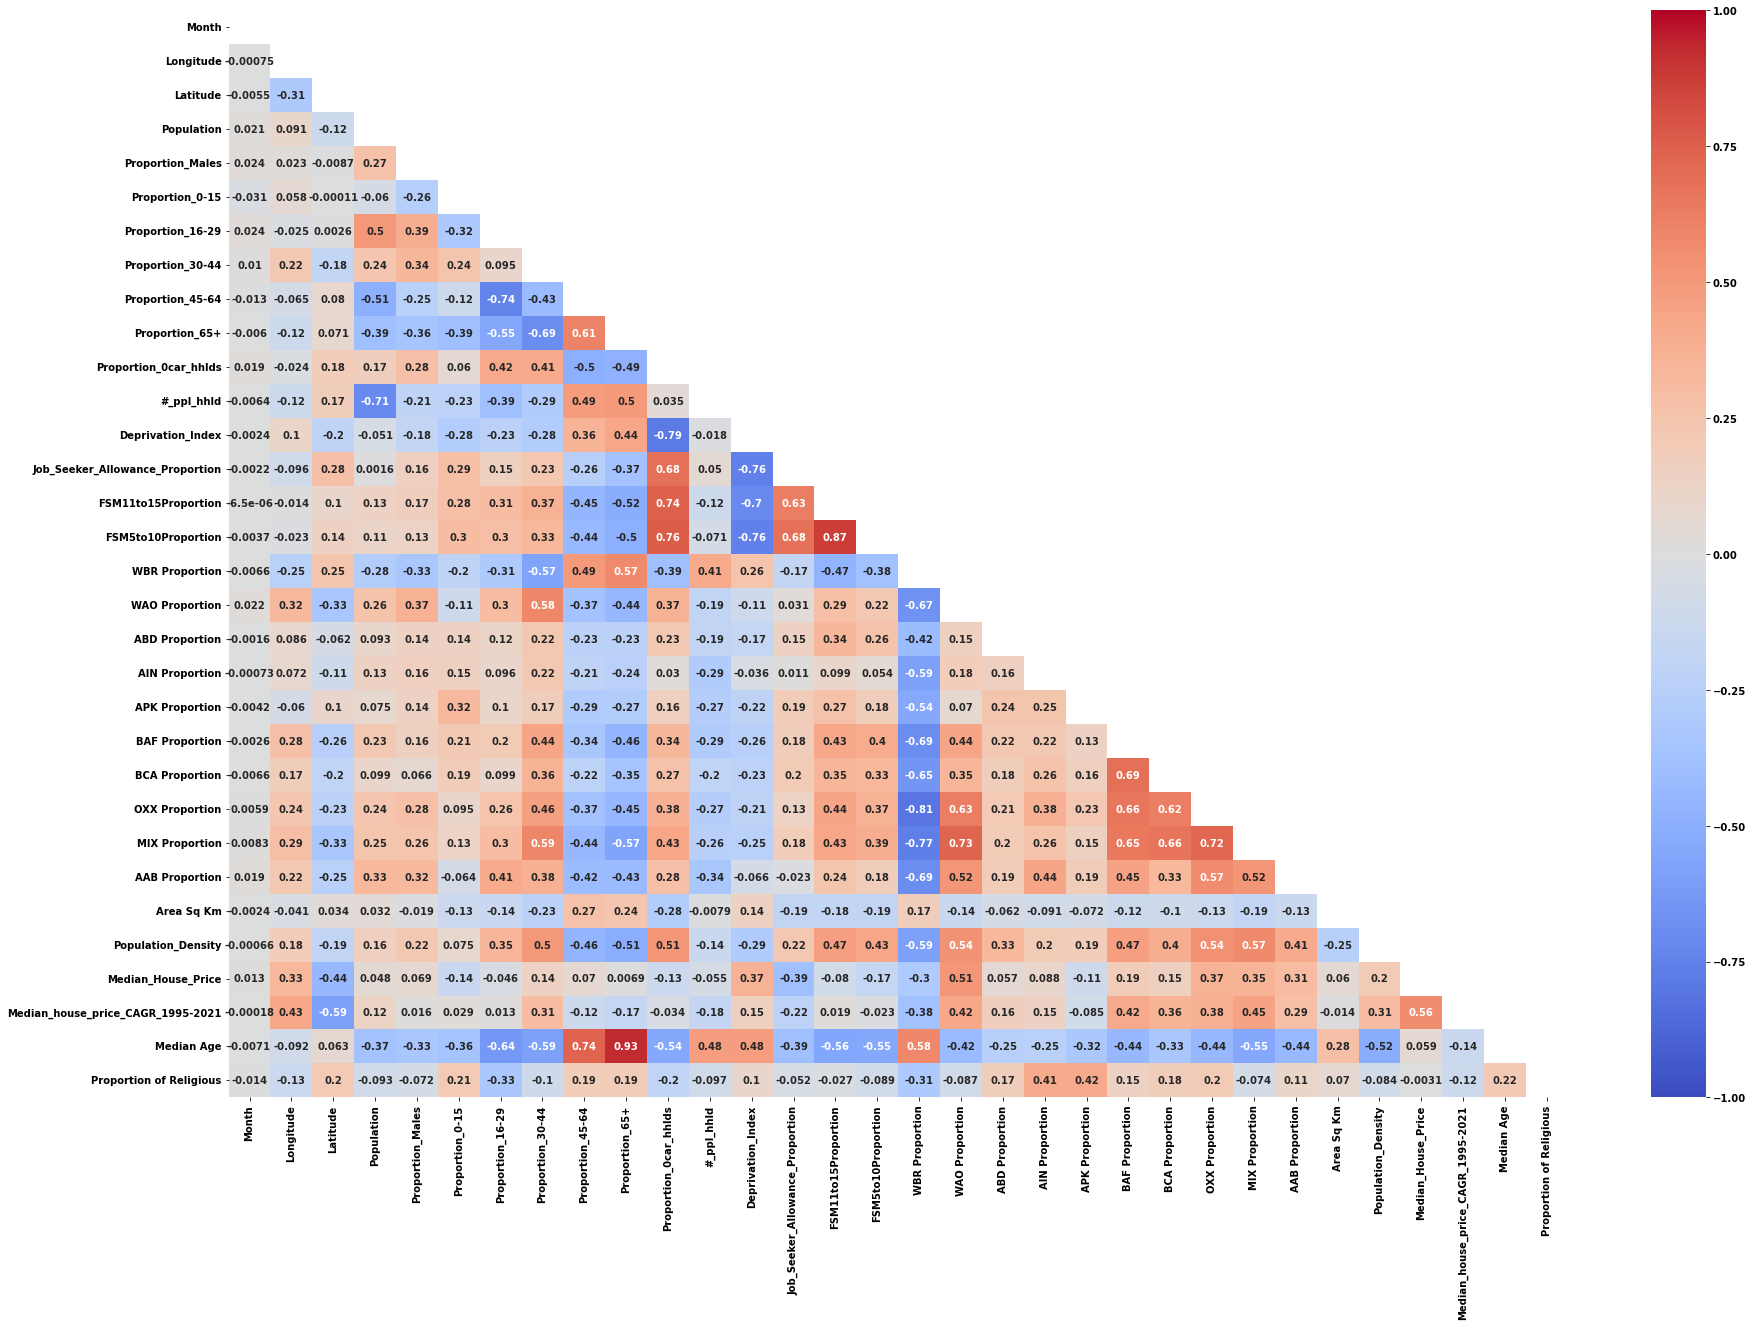

In [15]:
# Creating a heatmap
plt.figure(figsize=(30,20))

# Creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# creating mask of duplicated combinations
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

Not surprisingly, there is some multicollinearity in our data (for example, median age and proportion of people 65+, or proportion of Free School Meal recipients of various ages). 

We will need to take this into account when we build our logistic model, and will select features based on their impact on the independent variable.

<a id='3'></a>
## 3) CSV Output

We will perform the rest of the EDA using Tableau (See Tableau Book). In the meantime, we will export the new dataframe (with the names of similar Last Crime Outcomes merged) to be used for Tableau, and for the Feature Engineering notebook.

In [16]:
# Exporting the dataframe to a CSV file
df.to_csv(r'data\df_crime_FeatureEng.csv', index=False)

### This is the end of Jupyter Notebook 3 (of 5). Please proceed to Tableau Book and then Jupyter Notebook 4.